Loading the images

In [ ]:
!wget https://www.dropbox.com/s/65l30vfrcor803l/Tube.zip

--2023-04-19 19:56:48--  https://www.dropbox.com/s/65l30vfrcor803l/Tube.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/65l30vfrcor803l/Tube.zip [following]
--2023-04-19 19:56:49--  https://www.dropbox.com/s/raw/65l30vfrcor803l/Tube.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6d0f60464889889d084c15cbcd.dl.dropboxusercontent.com/cd/0/inline/B6f1CFjmg53JW59yWfEk4dPr6B8LP2XUNsdGZYc9qeLid-BTDQ67nFKVPk_n_MLxEFlUVP5qMPSrPyhPC6-EUVvzEUebOR_JvfT6WoysbYqLAwsE32a69P9lkmqWc2ZZyHXh6GP4QtN3NKN0ZwDGO_w6yIsBz93EartC2e7xdF2JXw/file# [following]
--2023-04-19 19:56:49--  https://uc6d0f60464889889d084c15cbcd.dl.dropboxusercontent.com/cd/0/inline/B6f1CFjmg53JW59yWfEk4dPr6B8LP2XUNsdGZYc9qeLid-BTDQ67nFKVPk_n_MLxEFlUVP5qMPSrPyhPC6-EUVvzEUeb

Unzip Images

In [ ]:
import zipfile
with zipfile.ZipFile("Tube.zip","r") as zip_ref:
    zip_ref.extractall("Tube")

In [ ]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
test1 = cv2.imread("Tube/IMG20230217191603.jpg", cv2.IMREAD_UNCHANGED)

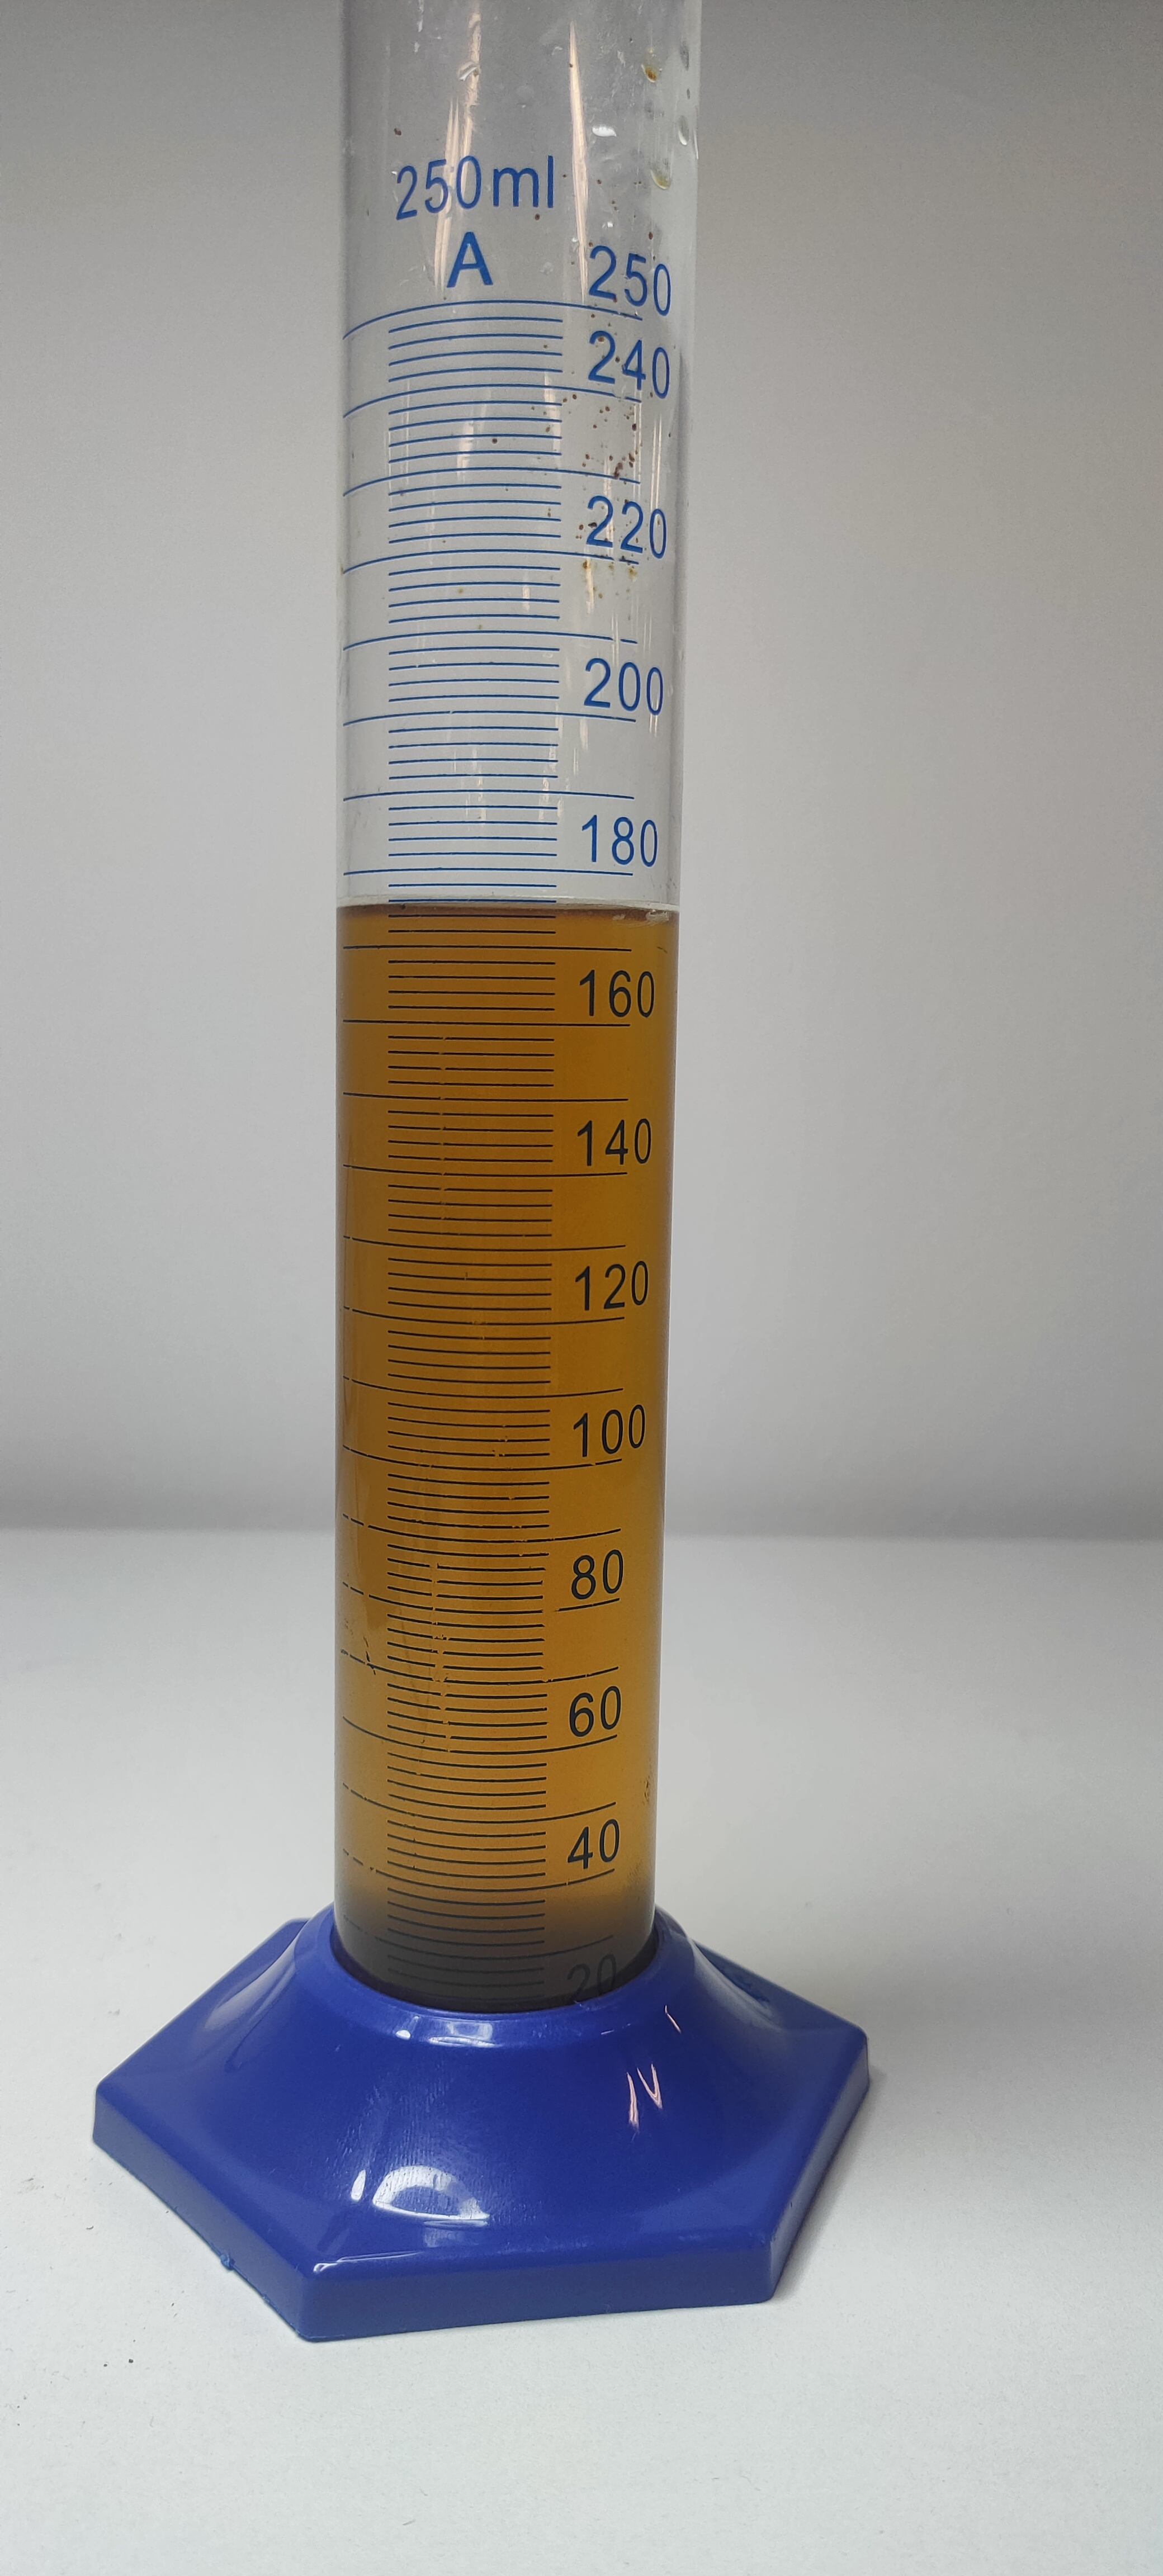

In [ ]:
cv2_imshow(test1)

In [ ]:
test1.shape

(4608, 2080, 3)

In [ ]:
scale_percent = 10
width = int(test1.shape[1] * scale_percent/100)
height = int(test1.shape[0] * scale_percent/100)
dim = (width, height)

test2 = cv2.resize(test1, dim, interpolation = cv2.INTER_AREA)

In [ ]:
test2.shape

(460, 208, 3)

In [ ]:
frame_threshold = cv2.inRange(test2, (75, 0, 0), (255, 255, 255))

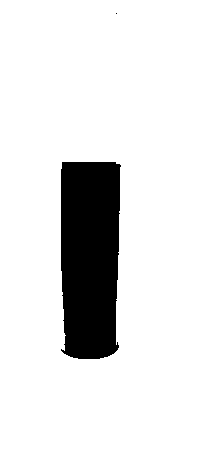

In [ ]:
cv2_imshow(frame_threshold)

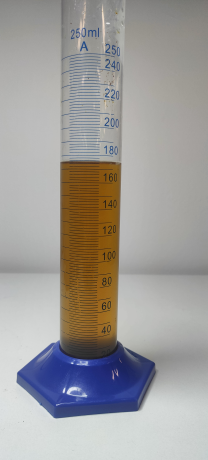

In [ ]:
#subplot = plt.subplot(1, 2, 1)
#plt.title("tube-test.jpg")
#plt.imshow(test1)
cv2_imshow(test2)

In [ ]:
def showInRow(list_of_images, titles = None, disable_ticks = False):
  count = len(list_of_images)
  for idx in range(count):
    subplot = plt.subplot(1, count, idx+1)
    if titles is not None:
      subplot.set_title(titles[idx])
      
    img = list_of_images[idx]
    cmap = 'gray' if (len(img.shape) == 2 or img.shape[2] == 1) else None
    subplot.imshow(img, cmap=cmap)
    if disable_ticks:
      plt.xticks([]), plt.yticks([])
  plt.show()

# Binary thresholding


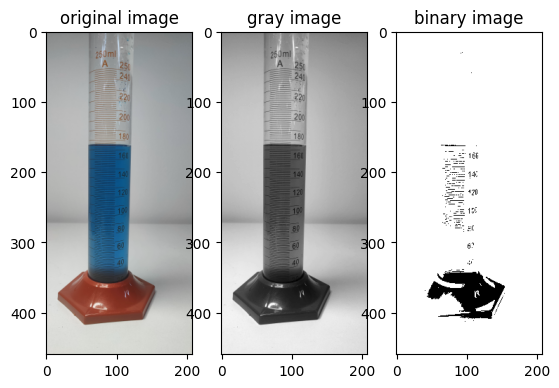

In [ ]:
thresh_val = 65 #@param {type:"slider", min:0, max:255, step:1}

test3 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

# Thresholding
ret,th1 = cv2.threshold(test3,thresh_val,255,cv2.THRESH_BINARY)

showInRow([test2, test3, th1], ['original image', 'gray image',  'binary image'])

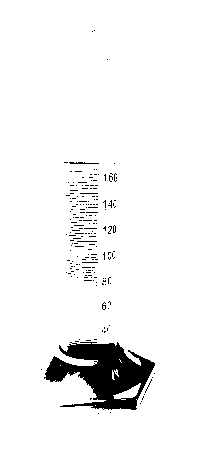

In [ ]:
cv2_imshow(th1) # Binary thresholding


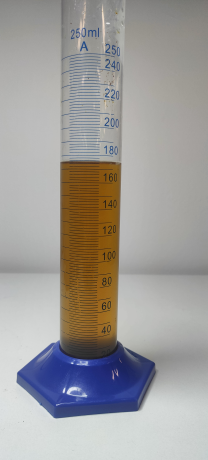

In [ ]:
cv2_imshow(test2) # Original


In [ ]:
block_size = 9
c_value = 5

# Adaptive mean and gaussian thresholding


In [ ]:
# Adaptive mean thresholding
th2 = cv2.adaptiveThreshold(test3,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,block_size,c_value)

# Adaptive gaussian thresholding
th3 = cv2.adaptiveThreshold(test3,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,block_size,c_value)

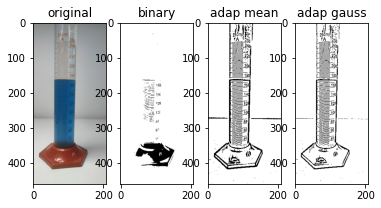

In [ ]:
images = [test2, th1, th2, th3]
titles = ["original", "binary", "adap mean", "adap gauss"]
showInRow(images, titles)

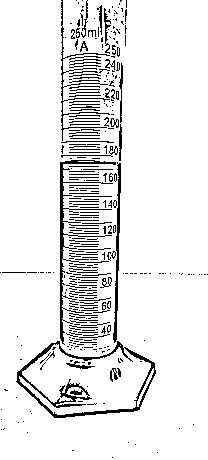

In [ ]:
cv2_imshow(th3)

# Sobel edge detection


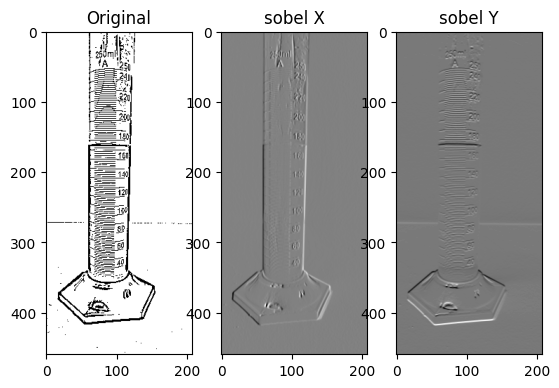

In [ ]:
sobelx = cv2.Sobel(test3,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(test3,cv2.CV_64F,0,1,ksize=3)

showInRow([th3, sobelx, sobely], ['Original', 'sobel X', 'sobel Y'])

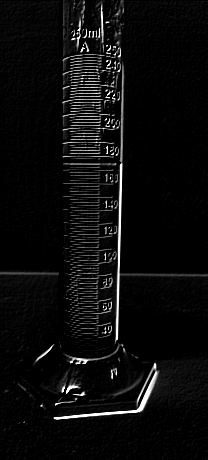

In [ ]:
cv2_imshow(sobely+sobelx)

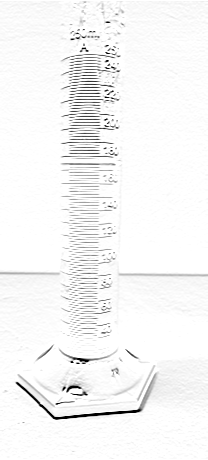

In [ ]:
cv2_imshow(255-sobely)

# Laplacian

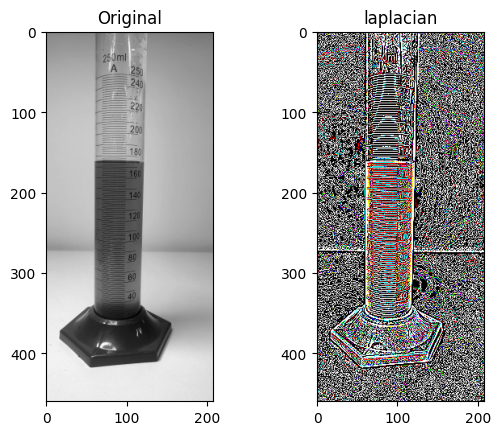

In [ ]:
laplacian = cv2.Laplacian(test2,cv2.CV_64F)
showInRow([test3, laplacian], ['Original', 'laplacian'])

# Canny edge detection


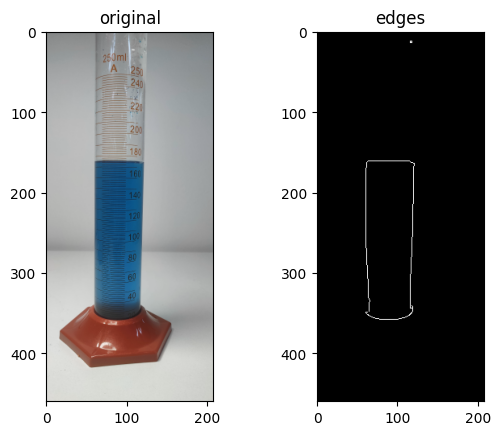

In [ ]:
edges = cv2.Canny(frame_threshold,threshold1=170, threshold2=250)
 
showInRow([test2, edges], ['original', 'edges'])

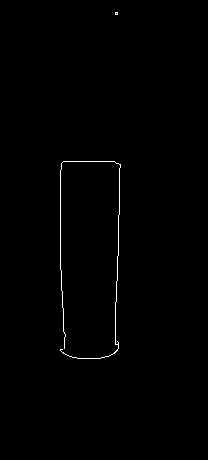

In [ ]:
cv2_imshow(edges)


# Find Contours

In [ ]:
contours, _ = cv2.findContours(frame_threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
print(contours)

(array([[[  0,   0]],

       [[  0, 459]],

       [[207, 459]],

       [[207,   0]]], dtype=int32), array([[[ 61, 162]],

       [[ 62, 161]],

       [[115, 161]],

       [[116, 162]],

       [[116, 163]],

       [[119, 163]],

       [[121, 165]],

       [[121, 166]],

       [[120, 167]],

       [[120, 210]],

       [[119, 211]],

       [[119, 212]],

       [[120, 213]],

       [[119, 214]],

       [[119, 251]],

       [[118, 252]],

       [[119, 253]],

       [[119, 254]],

       [[118, 255]],

       [[118, 279]],

       [[117, 280]],

       [[117, 298]],

       [[116, 299]],

       [[117, 300]],

       [[116, 301]],

       [[116, 344]],

       [[116, 342]],

       [[117, 341]],

       [[118, 342]],

       [[118, 344]],

       [[119, 345]],

       [[119, 347]],

       [[118, 348]],

       [[118, 349]],

       [[113, 354]],

       [[112, 354]],

       [[111, 355]],

       [[110, 355]],

       [[109, 356]],

       [[108, 356]],

       [[107, 357

In [ ]:
objects_contours = []

for cnt in contours:
  area = cv2.contourArea(cnt)
  if area > 1500 and area < 50000:
    objects_contours.append(cnt)

In [ ]:
objects_contours

[array([[[ 61, 162]],
 
        [[ 62, 161]],
 
        [[115, 161]],
 
        [[116, 162]],
 
        [[116, 163]],
 
        [[119, 163]],
 
        [[121, 165]],
 
        [[121, 166]],
 
        [[120, 167]],
 
        [[120, 210]],
 
        [[119, 211]],
 
        [[119, 212]],
 
        [[120, 213]],
 
        [[119, 214]],
 
        [[119, 251]],
 
        [[118, 252]],
 
        [[119, 253]],
 
        [[119, 254]],
 
        [[118, 255]],
 
        [[118, 279]],
 
        [[117, 280]],
 
        [[117, 298]],
 
        [[116, 299]],
 
        [[117, 300]],
 
        [[116, 301]],
 
        [[116, 344]],
 
        [[116, 342]],
 
        [[117, 341]],
 
        [[118, 342]],
 
        [[118, 344]],
 
        [[119, 345]],
 
        [[119, 347]],
 
        [[118, 348]],
 
        [[118, 349]],
 
        [[113, 354]],
 
        [[112, 354]],
 
        [[111, 355]],
 
        [[110, 355]],
 
        [[109, 356]],
 
        [[108, 356]],
 
        [[107, 357]],
 
        [[104, 3

In [ ]:
test2_copy = test2.copy()
for cnt in objects_contours:
  # Get the rectangle
  rect = cv2.minAreaRect(cnt)
  (x, y), (w, h), angle = rect

  # Display Rectangle
  box = cv2.boxPoints(rect)
  box = np.int0(box)
  known_width = 41.5

  object_width_ratio = w/known_width

  cv2.circle(test2_copy, (int(x), int(y)), 5, (0, 0, 255), -1)
  cv2.polylines(test2_copy, [box], True, (255, 0, 0), 2)
  cv2.putText(test2_copy, "Width : {}".format(round(w/object_width_ratio, 1)), (int(x-100), int(y-20)), cv2.FONT_HERSHEY_PLAIN, 1, (100, 255, 0), 2)
  cv2.putText(test2_copy, "Height : {}".format(round(h/object_width_ratio, 1)), (int(x-100), int(y+15)), cv2.FONT_HERSHEY_PLAIN, 1, (100, 255, 0), 2)

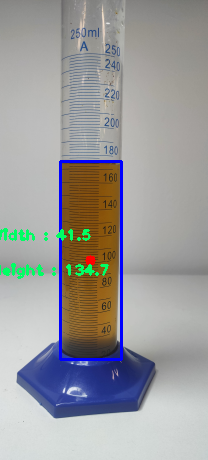

In [ ]:
cv2_imshow(test2_copy)

In [ ]:
w

61.0

In [ ]:
h

198.0

In [ ]:
test2_copy.shape

(460, 208, 3)

# Graduated Flask Segmentation based on Yolov8

In [ ]:
!pip3 install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.4/303.4 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 10.1 MB/s eta 0:00:00


In [ ]:
!ultralytics


    Arguments received: ['yolo']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of [detect, segment, classify]
                MODE (required) is one of [train, val, predict, export, track]
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco128.yaml model=yolov8n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolov8n-seg.pt source='https://youtu.be/Zgi9g1ksQHc' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolov8n.pt data=coco128.yaml batch=1 imgsz=640

    4. Export a YOLOv8n classification model

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.8/107.7 GB disk)


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs



  0%|          | 0.00/104k [00:00<?, ?B/s]

image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 225.6ms
Speed: 10.4ms preprocess, 225.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
results[0].boxes.cls

tensor([ 0., 16.,  2.])

In [ ]:

!cd {HOME}
!yolo task=segment mode=predict model=yolov8s-seg.pt conf=0.25 source= save=true

100% 22.8M/22.8M [00:01<00:00, 16.6MB/s]
Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
YOLOv8s-seg summary (fused): 195 layers, 11810560 parameters, 0 gradients, 42.6 GFLOPs

Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 760.4ms
Speed: 2.7ms preprocess, 760.4ms inference, 6.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


In [ ]:
# We will train out model and add it in place of yolov8s-seg.pt and run

model = YOLO(f'{HOME}/yolov8s-seg.pt')
results = model.predict(source=f'{HOME}/bus.jpg', conf=0.25, save=True)

WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
Ultralytics YOLOv8.0.48 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
WARNING ⚠️ Video stream unresponsive, please check your IP camera connection.
W

In [ ]:
import cv2
print(cv2.__version__)

4.6.0
